In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
img = cv2.imread('dataset/Celebrity Faces Dataset/Angelina Jolie/001_fe3347c0.jpg')

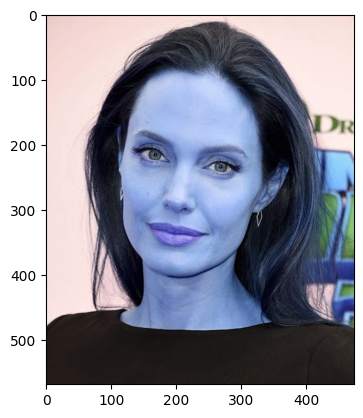

In [3]:
plt.imshow(img)

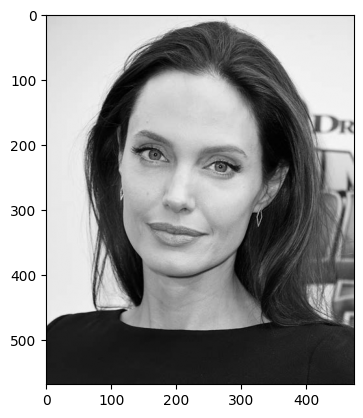

In [4]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow((gray_img), cmap='gray')

In [5]:
eyes_cascade = cv2.CascadeClassifier("haarcascade_eye.xml")
faces_cascade = cv2.CascadeClassifier("haarcascade_frontalface_alt2.xml")

In [6]:
# face = faces_cascade.detectMultiScale(gray_img)
# x, y, w, h = face[0]
# img_face = cv2.rectangle(gray_img, (x, y), (x + w, y + h), (255, 0, 0), 3)

# plt.imshow(img_face, cmap='gray')


In [7]:
# eyes = eyes_cascade.detectMultiScale(gray_img)
# for (ex, ey, ew, eh) in eyes:
#     img_eye = cv2.rectangle(gray_img, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 3)
# plt.imshow(img_eye)

In [8]:
cv2.destroyAllWindows()

In [9]:
def detect_face_and_eyes(path):
    img = cv2.imread(path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
    faces = faces_cascade.detectMultiScale(gray_img, 1.3, 5)
    for (x, y, w, h) in faces:
        img_face = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 3)
        cropped_gray = gray_img[y:y + h, x:x + w]
        cropped_face = img_face[y:y + h, x:x + w]

        eyes = eyes_cascade.detectMultiScale(cropped_gray)
        if len(eyes) >= 2:
            return cropped_face
    

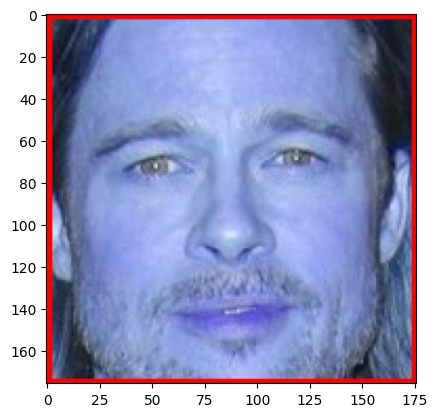

In [10]:
cropped_face = detect_face_and_eyes('dataset/Celebrity Faces Dataset/Brad Pitt/087_155f1f74.jpg')
plt.imshow(cropped_face, cmap='gray')

In [11]:
dataset_path = './dataset/Celebrity Faces Dataset/'
cleaned_data_path = './cleaned_data/' 

In [12]:
import os
folder = []
for name in os.listdir(dataset_path):
    if os.path.isdir(os.path.join(dataset_path, name)):
        folder.append(dataset_path+name)

In [13]:
folder

['./dataset/Celebrity Faces Dataset/Angelina Jolie',
 './dataset/Celebrity Faces Dataset/Brad Pitt',
 './dataset/Celebrity Faces Dataset/Hugh Jackman',
 './dataset/Celebrity Faces Dataset/Johnny Depp',
 './dataset/Celebrity Faces Dataset/Leonardo DiCaprio',
 './dataset/Celebrity Faces Dataset/Robert Downey Jr',
 './dataset/Celebrity Faces Dataset/Scarlett Johansson',
 './dataset/Celebrity Faces Dataset/Will Smith']

In [14]:
import shutil
if os.path.exists(cleaned_data_path):
    shutil.rmtree(cleaned_data_path)
os.makedirs(cleaned_data_path)

In [15]:
cropped_path = []
celeb_directories = {}

for celebrity_folder in folder:
    celeb_name = celebrity_folder.split('/')[-1]
    print("Processing images of:", celeb_name)
    if not os.path.exists(cleaned_data_path+celeb_name):
        os.makedirs(cleaned_data_path+celeb_name)
    count = 0
    for img_name in os.listdir(celebrity_folder):
        img_path = celebrity_folder + '/' + img_name
        cropped_face = detect_face_and_eyes(img_path)

        if cropped_face is not None:
            path_to_save = cleaned_data_path + celeb_name+'/' + celeb_name + str(count)+".png"
            cropped_path.append(path_to_save)
            cv2.imwrite(path_to_save, cropped_face)
            count += 1
    celeb_directories[celeb_name] = cropped_path
    cropped_path = []
        
   

Processing images of: Angelina Jolie
Processing images of: Brad Pitt
Processing images of: Hugh Jackman
Processing images of: Johnny Depp
Processing images of: Leonardo DiCaprio
Processing images of: Robert Downey Jr
Processing images of: Scarlett Johansson
Processing images of: Will Smith


In [16]:
celeb_directories["Hugh Jackman"]

['./cleaned_data/Hugh Jackman/Hugh Jackman0.png',
 './cleaned_data/Hugh Jackman/Hugh Jackman1.png',
 './cleaned_data/Hugh Jackman/Hugh Jackman2.png',
 './cleaned_data/Hugh Jackman/Hugh Jackman3.png',
 './cleaned_data/Hugh Jackman/Hugh Jackman4.png',
 './cleaned_data/Hugh Jackman/Hugh Jackman5.png',
 './cleaned_data/Hugh Jackman/Hugh Jackman6.png',
 './cleaned_data/Hugh Jackman/Hugh Jackman7.png',
 './cleaned_data/Hugh Jackman/Hugh Jackman8.png',
 './cleaned_data/Hugh Jackman/Hugh Jackman9.png',
 './cleaned_data/Hugh Jackman/Hugh Jackman10.png',
 './cleaned_data/Hugh Jackman/Hugh Jackman11.png',
 './cleaned_data/Hugh Jackman/Hugh Jackman12.png',
 './cleaned_data/Hugh Jackman/Hugh Jackman13.png',
 './cleaned_data/Hugh Jackman/Hugh Jackman14.png',
 './cleaned_data/Hugh Jackman/Hugh Jackman15.png',
 './cleaned_data/Hugh Jackman/Hugh Jackman16.png',
 './cleaned_data/Hugh Jackman/Hugh Jackman17.png',
 './cleaned_data/Hugh Jackman/Hugh Jackman18.png',
 './cleaned_data/Hugh Jackman/Hugh Jackma

In [17]:
import pywt

def haar_transform(image, mode='haar', level=1):
    img_array = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Convert to grayscale

    img_array = np.float32(img_array) / 255.0 # Converting to float and Normalize the image

    coeffs = pywt.wavedec2(img_array, mode, level) # Apply Haar Wavelet Transform
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0 # Set Approximation coefficients to zero

    h_img = pywt.waverec2(coeffs_H, mode) # Reconstruct the image using modified coefficients
    h_img = h_img * 255
    h_img = np.uint8(h_img)

    return h_img

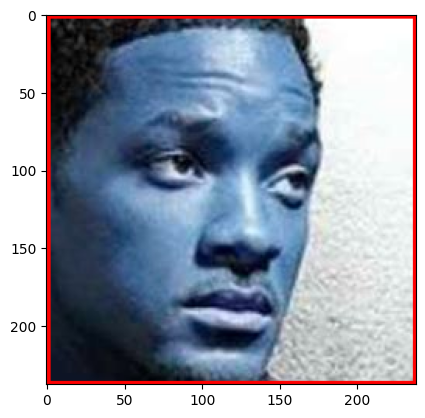

In [18]:
plt.imshow(cropped_face)

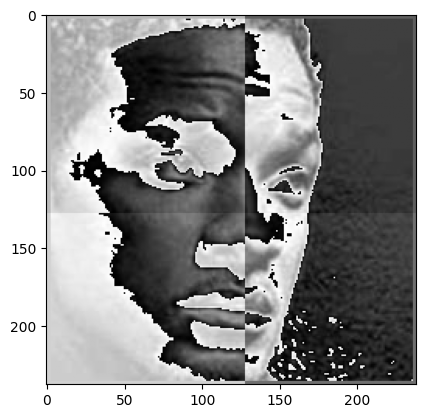

In [19]:
img1 = haar_transform(cropped_face)
plt.imshow(img1, cmap='gray')

In [20]:
# encoding celebrities
encode_celebrities = {}
for idx, celebrity in enumerate(celeb_directories.keys()):
    encode_celebrities[celebrity] = idx
encode_celebrities

{'Angelina Jolie': 0,
 'Brad Pitt': 1,
 'Hugh Jackman': 2,
 'Johnny Depp': 3,
 'Leonardo DiCaprio': 4,
 'Robert Downey Jr': 5,
 'Scarlett Johansson': 6,
 'Will Smith': 7}

In [21]:
X = []
y = []
for celebrity in celeb_directories.keys():
    print("Applying Haar Transform on images of:", celebrity)
    for img_path in celeb_directories[celebrity]:
        img = cv2.imread(img_path)
        scaled_img = cv2.resize(img, (64, 64)) # Resize to 32x32
        
        haar_img = haar_transform(scaled_img)
        haar_img = cv2.resize(haar_img, (64, 64)) # Resize to 32x32 

        combined = np.vstack((scaled_img.reshape(64*64*3,1), haar_img.reshape(64*64,1))) # combine original and haar images

        X.append(combined)
        y.append(encode_celebrities[celebrity])

Applying Haar Transform on images of: Angelina Jolie
Applying Haar Transform on images of: Brad Pitt
Applying Haar Transform on images of: Hugh Jackman
Applying Haar Transform on images of: Johnny Depp
Applying Haar Transform on images of: Leonardo DiCaprio
Applying Haar Transform on images of: Robert Downey Jr
Applying Haar Transform on images of: Scarlett Johansson
Applying Haar Transform on images of: Will Smith


In [22]:
len(X[0])

16384

In [23]:
X = np.array(X).reshape(len(X), len(X[0])).astype('float32')

In [24]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [26]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [ ]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    print("Training model:", algo, "with parameters:", mp['params'])
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

Training model: svm with parameters: {'svc__C': [1, 10], 'svc__kernel': ['rbf', 'linear']}
